<img src="https://github.com/SanDiegoMachineLearning/bookclub/blob/master/images/graph.jpg?raw=true" width="160" align="left"> 

Links to the slides, videos, sample code, and other materials for the Meetup series about **Machine Learning with Graphs** are located in San Diego Machine Learning's GitHub book club repository:  https://github.com/SanDiegoMachineLearning/bookclub

# PageRank

Some code from notebook came from sample code for the book **[Graph Machine Learning](https://www.amazon.com/dp/1800204493)** by Claudio Stamile et al.  These notebooks can be found at https://github.com/PacktPublishing/Graph-Machine-Learning.

#### Installing packages
Uncomment the following code block to install the package versions recommended by the book

In [1]:
# !pip install networkx==2.5 
# !pip install matplotlib==3.2.2 
# !pip install pandas==1.1.3 
# !pip install scipy==1.6.2 

#### Helper Function to Plot Graphs

In [2]:
import matplotlib.pyplot as plt

def draw_graph(G, pos_nodes, node_names={}, node_size=50, plot_weight=False):
    nx.draw(G, pos_nodes, with_labels=False, node_size=node_size, edge_color='gray', arrowsize=30)
    
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
    nx.draw_networkx_labels(G, pos_attrs, font_family='serif', font_size=20)
    
    
    if plot_weight:
        pos_attrs = {}
        for node, coords in pos_nodes.items():
            pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
        nx.draw_networkx_labels(G, pos_attrs, font_family='serif', font_size=20)
        edge_labels=dict([((a,b,),d["weight"]) for a,b,d in G.edges(data=True)])
        nx.draw_networkx_edge_labels(G, pos_nodes, edge_labels=edge_labels)
    
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])

### PageRank

     a    y    m
a  0.0  1.0  1.0
y  1.0  1.0  0.0
m  0.0  0.0  1.0


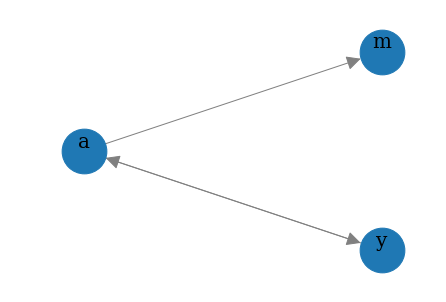

In [3]:
import networkx as nx
G = nx.DiGraph()
V = {'a', 'y', 'm'}
E = [('a','m'), ('a','y'), ('m', 'm'), ('y','a'), ('y','y')]
G.add_nodes_from(V)
G.add_edges_from(E)
print(nx.to_pandas_adjacency(G))
draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=2000)

In [4]:
pr = nx.pagerank(G, alpha=0.8)
for v in sorted(pr.keys()):
    print(v, round(pr[v], 3), 'or', int(round(33 * pr[v], 0)), '/ 33')

a 0.152 or 5 / 33
m 0.636 or 21 / 33
y 0.212 or 7 / 33


#### Bigger example

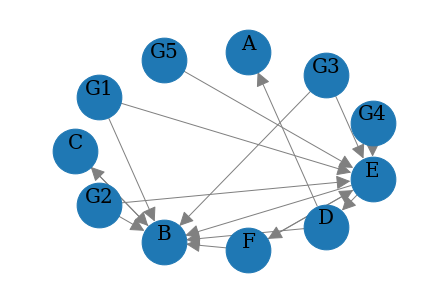

In [5]:
import networkx as nx

G = nx.DiGraph()
V = {'A','B','C','D','E','F','G1','G2','G3','G4','G5'}
E = [('B','C'), ('C','B'), ('D','A'), ('D','B'), ('E','B'), ('E','D'), ('E','F'), ('F','B'), ('F','E') \
     , ('G1','B'), ('G1','E'), ('G2','B'), ('G2','E'), ('G3','B'), ('G3','E'), ('G4','E'), ('G5','E')]
G.add_nodes_from(V)
G.add_edges_from(E)
# print(nx.to_pandas_adjacency(G))
draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=2000)

In [6]:
pr = nx.pagerank(G, alpha=0.85)
for v in sorted(pr.keys()):
    print(v, round(100 * pr[v], 1))

A 3.3
B 38.4
C 34.3
D 3.9
E 8.1
F 3.9
G1 1.6
G2 1.6
G3 1.6
G4 1.6
G5 1.6


<img src="https://upload.wikimedia.org/wikipedia/commons/f/fb/PageRanks-Example.svg" width="500" align="left">

#### Adjusting dampening/teleports

In [7]:
pr = nx.pagerank(G, alpha=0.85)
print('With 0.85:')
for v in sorted(pr.keys()):
    print(v, round(100 * pr[v], 1))
    
print()
pr = nx.pagerank(G, alpha=0.8)
print('With 0.8:')
for v in sorted(pr.keys()):
    print(v, round(100 * pr[v], 1))

With 0.85:
A 3.3
B 38.4
C 34.3
D 3.9
E 8.1
F 3.9
G1 1.6
G2 1.6
G3 1.6
G4 1.6
G5 1.6

With 0.8:
A 4.0
B 35.5
C 30.5
D 4.8
E 9.9
F 4.8
G1 2.1
G2 2.1
G3 2.1
G4 2.1
G5 2.1


### Personal PageRank

Personal PageRank scores for nodes E, F, and G1

In [8]:
pr = nx.pagerank(G, alpha=0.85, personalization={'E': 1})
for v in sorted(pr.keys()):
    print(v, round(100 * pr[v], 1))

A 2.3
B 36.5
C 31.0
D 5.5
E 19.3
F 5.5
G1 0.0
G2 0.0
G3 0.0
G4 0.0
G5 0.0


In [9]:
pr = nx.pagerank(G, alpha=0.85, personalization={'F': 1})
for v in sorted(pr.keys()):
    print(v, round(100 * pr[v], 1))

A 0.9
B 38.6
C 32.8
D 2.2
E 7.6
F 17.9
G1 0.0
G2 0.0
G3 0.0
G4 0.0
G5 0.0


In [10]:
pr = nx.pagerank(G, alpha=0.85, personalization={'G1': 1})
for v in sorted(pr.keys()):
    print(v, round(100 * pr[v], 1))

A 0.9
B 38.6
C 32.8
D 2.2
E 7.6
F 2.2
G1 15.8
G2 0.0
G3 0.0
G4 0.0
G5 0.0
